# Question 1:

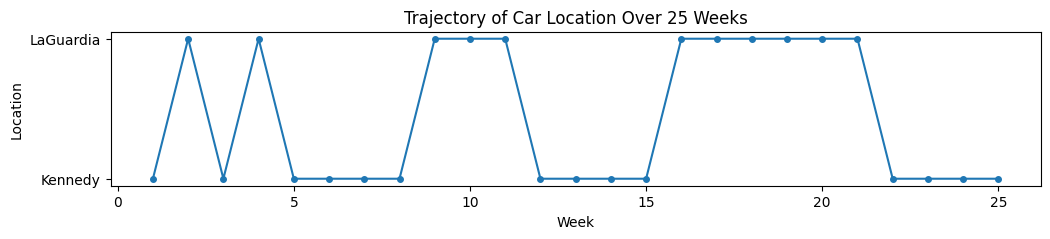

In [1]:
# Question 1 Part 1

import numpy as np
import matplotlib.pyplot as plt

# Define the transition matrix T
T = np.array([[0.7, 0.3],
              [0.2, 0.8]])

# States
states = ['Kennedy', 'LaGuardia']

# Number of simulations (for illustration, we'll simulate one trajectory)
num_steps = 25

# Initialize the state: start with 50% probability at each airport
current_state = np.random.choice([0, 1], p=[0.5, 0.5])
trajectory = [current_state]

# Simulate the Markov chain
for _ in range(num_steps - 1):
    current_state = np.random.choice([0, 1], p=T[current_state])
    trajectory.append(current_state)

# Convert state indices to names for plotting
trajectory_names = [states[state] for state in trajectory]

# Plot the trajectory
plt.figure(figsize=(12, 2))
plt.plot(range(1, num_steps + 1), trajectory, marker='o', linestyle='-', markersize=4)
plt.yticks([0, 1], states)
plt.xlabel('Week')
plt.ylabel('Location')
plt.title('Trajectory of Car Location Over 25 Weeks')
plt.show()


Empirical Fraction at Kennedy: 0.3839
Empirical Fraction at LaGuardia: 0.6161


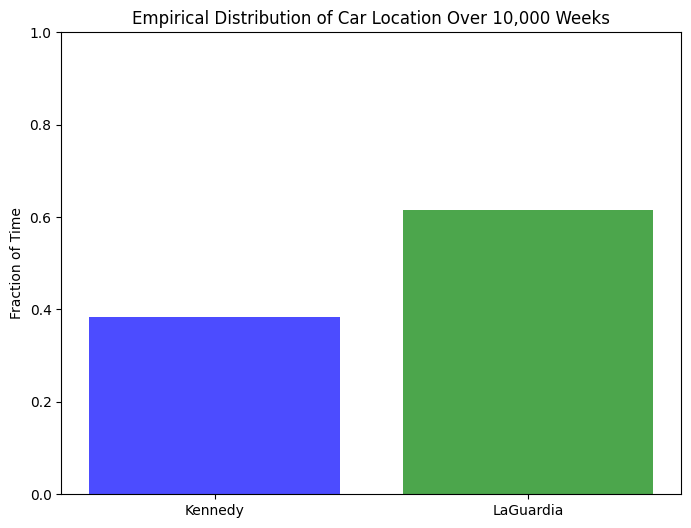

In [2]:
# Quetion 1 part 2

num_steps = 10000

# Initialize the state: start with 50% probability at each airport
current_state = np.random.choice([0, 1], p=[0.5, 0.5])
trajectory = [current_state]

# Simulate the Markov chain
for _ in range(num_steps - 1):
    current_state = np.random.choice([0, 1], p=T[current_state])
    trajectory.append(current_state)

# Convert trajectory to numpy array for efficient computation
trajectory = np.array(trajectory)

# Calculate empirical distribution
count_kennedy = np.sum(trajectory == 0)
count_laguardia = np.sum(trajectory == 1)

empirical_fraction_kennedy = count_kennedy / num_steps
empirical_fraction_laguardia = count_laguardia / num_steps

print(f"Empirical Fraction at Kennedy: {empirical_fraction_kennedy:.4f}")
print(f"Empirical Fraction at LaGuardia: {empirical_fraction_laguardia:.4f}")

# Plot the empirical distribution
plt.figure(figsize=(8, 6))
plt.bar(['Kennedy', 'LaGuardia'], [empirical_fraction_kennedy, empirical_fraction_laguardia],
        color=['blue', 'green'], alpha=0.7)
plt.ylabel('Fraction of Time')
plt.title('Empirical Distribution of Car Location Over 10,000 Weeks')
plt.ylim(0, 1)
plt.show()

# Question 2

Completed 10000 simulations...
Completed 20000 simulations...
Completed 30000 simulations...
Completed 40000 simulations...
Completed 50000 simulations...
Completed 60000 simulations...
Completed 70000 simulations...
Completed 80000 simulations...
Completed 90000 simulations...
Completed 100000 simulations...

Simulation Results:
Fraction of recruits that become supervisors: 0.2518 (Analytical: 0.25)
Fraction of recruits that quit: 0.7482 (Analytical: 0.75)
Expected time until absorption: 2.9245 weeks (Analytical: 2.9167 weeks)


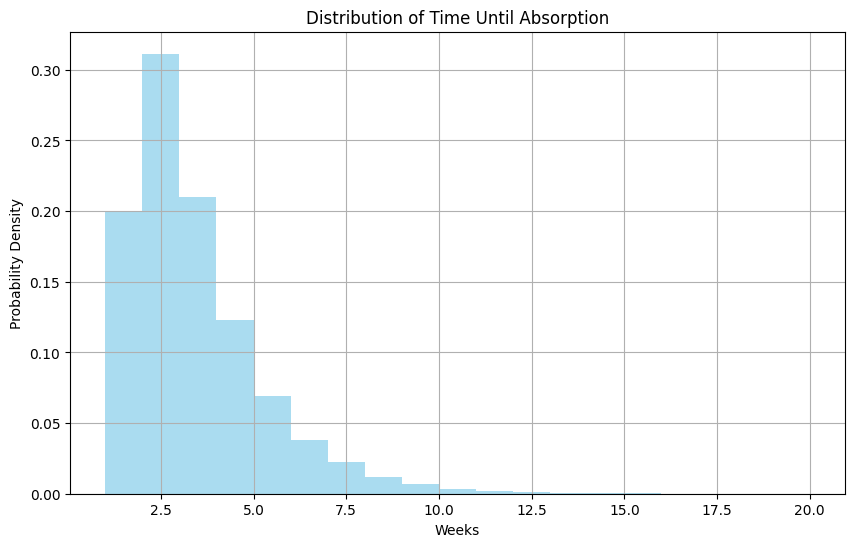

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define states
STATE_R = 0  # Recruit
STATE_T = 1  # Technician
STATE_S = 2  # Supervisor (absorbing)
STATE_Q = 3  # Quit (absorbing)

# Transition probability matrix
transition_matrix = np.array([
    [0.2, 0.6, 0.0, 0.2],  # From R
    [0.0, 0.55, 0.15, 0.3],  # From T
    [0.0, 0.0, 1.0, 0.0],    # From S
    [0.0, 0.0, 0.0, 1.0]     # From Q
])

# Number of simulations
num_simulations = 100000

# Arrays to store results
absorptions = np.zeros(num_simulations, dtype=int)  # 2 for S, 3 for Q
times_to_absorption = np.zeros(num_simulations, dtype=int)

# Function to simulate a single trajectory
def simulate_trajectory():
    current_state = STATE_R
    time = 0
    while current_state not in [STATE_S, STATE_Q]:
        # Draw next state based on current state
        next_state = np.random.choice(
            [STATE_R, STATE_T, STATE_S, STATE_Q],
            p=transition_matrix[current_state]
        )
        current_state = next_state
        time += 1
    return current_state, time

# Simulate all trajectories
for i in range(num_simulations):
    absorption, time = simulate_trajectory()
    absorptions[i] = absorption
    times_to_absorption[i] = time
    if (i+1) % 10000 == 0:
        print(f"Completed {i+1} simulations...")

# Calculate fraction of recruits that become supervisors
fraction_S = np.sum(absorptions == STATE_S) / num_simulations
fraction_Q = np.sum(absorptions == STATE_Q) / num_simulations

# Calculate expected time until absorption
expected_time = np.mean(times_to_absorption)

# Display results
print("\nSimulation Results:")
print(f"Fraction of recruits that become supervisors: {fraction_S:.4f} (Analytical: 0.25)")
print(f"Fraction of recruits that quit: {fraction_Q:.4f} (Analytical: 0.75)")
print(f"Expected time until absorption: {expected_time:.4f} weeks (Analytical: 2.9167 weeks)")

# Plotting the distribution of times to absorption
plt.figure(figsize=(10,6))
plt.hist(times_to_absorption, bins=range(1, max(times_to_absorption)+1), density=True, alpha=0.7, color='skyblue')
plt.title('Distribution of Time Until Absorption')
plt.xlabel('Weeks')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


# Question 3

Empirical distribution m_L:
Vertex 0: 0.0440100 (Uniform: 0.04348)
Vertex 1: 0.0434400 (Uniform: 0.04348)
Vertex 2: 0.0433800 (Uniform: 0.04348)
Vertex 3: 0.0429300 (Uniform: 0.04348)
Vertex 4: 0.0426000 (Uniform: 0.04348)
Vertex 5: 0.0432700 (Uniform: 0.04348)
Vertex 6: 0.0436500 (Uniform: 0.04348)
Vertex 7: 0.0438100 (Uniform: 0.04348)
Vertex 8: 0.0438100 (Uniform: 0.04348)
Vertex 9: 0.0434500 (Uniform: 0.04348)
Vertex 10: 0.0431800 (Uniform: 0.04348)
Vertex 11: 0.0435900 (Uniform: 0.04348)
Vertex 12: 0.0421000 (Uniform: 0.04348)
Vertex 13: 0.0403300 (Uniform: 0.04348)
Vertex 14: 0.0418200 (Uniform: 0.04348)
Vertex 15: 0.0437000 (Uniform: 0.04348)
Vertex 16: 0.0441600 (Uniform: 0.04348)
Vertex 17: 0.0441500 (Uniform: 0.04348)
Vertex 18: 0.0438900 (Uniform: 0.04348)
Vertex 19: 0.0436800 (Uniform: 0.04348)
Vertex 20: 0.0443600 (Uniform: 0.04348)
Vertex 21: 0.0454200 (Uniform: 0.04348)
Vertex 22: 0.0452700 (Uniform: 0.04348)
Analytical result in high precision = 0.043478260869565216


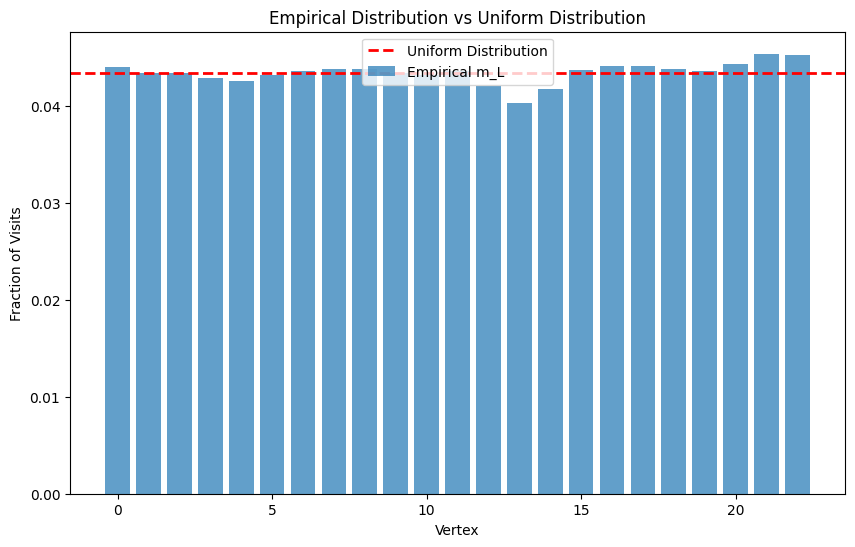

In [4]:
# Question 3 Part 3

# Parameters
N = 23  # Number of vertices
L = 100000  # Number of steps

# Initialize the walk
current_state = 0  # Starting at vertex 0
walk = np.zeros(L, dtype=int)

# Simulate the random walk
for step in range(L):
    # Determine neighbors
    left = (current_state - 1) % N # we can use mod to calculate the index of a system - since circular
    right = (current_state + 1) % N
    # Choose the next state uniformly
    current_state = np.random.choice([left, right])
    walk[step] = current_state

# Compute empirical distribution m_L
counts = np.bincount(walk, minlength=N)
m_L = counts / L

# Uniform distribution
uniform = np.ones(N) / N

# Print the results
print("Empirical distribution m_L:")
for k in range(N):
    print(f"Vertex {k}: {m_L[k]:.7f} (Uniform: {uniform[k]:.5f})")
    
print("Analytical result in high precision = " + str(1/N))

# Plot the empirical vs uniform distribution
plt.figure(figsize=(10,6))
plt.bar(range(N), m_L, alpha=0.7, label='Empirical m_L')
plt.axhline(1/N, color='red', linestyle='dashed', linewidth=2, label='Uniform Distribution')
plt.xlabel('Vertex')
plt.ylabel('Fraction of Visits')
plt.title('Empirical Distribution vs Uniform Distribution')
plt.legend()
plt.show()

# print(current_state)


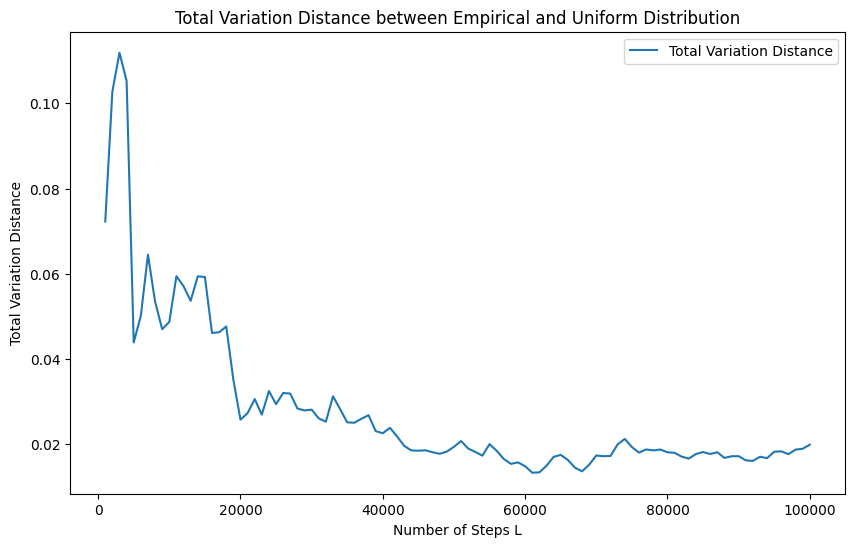

In [5]:

checkpoint = 1000  # Interval for computing TV distance

# Reinitialize the walk
current_state = 0  # Starting at vertex 0
walk = np.zeros(L, dtype=int)

# Initialize counts
counts = np.zeros(N, dtype=int)

# Initialize lists to store TV distance and corresponding L
tv_distances = []
Ls = []

# Simulate the random walk and compute TV distance at intervals
for step in range(L):
    # Determine neighbors
    left = (current_state - 1) % N
    right = (current_state + 1) % N
    # Choose the next state uniformly
    current_state = np.random.choice([left, right])
    walk[step] = current_state
    # Update counts
    counts[current_state] += 1
    # Checkpoint to compute TV distance
    if (step + 1) % checkpoint == 0:
        m_L = counts / (step + 1)
        uniform = np.ones(N) / N
        tv = 0.5 * np.sum(np.abs(m_L - uniform))
        tv_distances.append(tv)
        Ls.append(step + 1)

# Plot TV distance vs L
plt.figure(figsize=(10,6))
plt.plot(Ls, tv_distances, label='Total Variation Distance')
plt.xlabel('Number of Steps L')
plt.ylabel('Total Variation Distance')
plt.title('Total Variation Distance between Empirical and Uniform Distribution')
plt.legend()
# plt.grid(True)
plt.show()


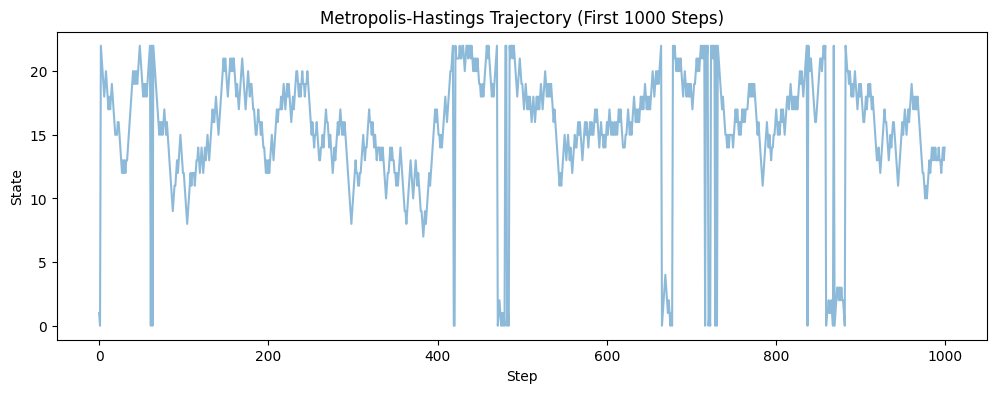

In [6]:
# In ML lingo, our "energy function" is H(k) = sin(2*pi*k/N) and we are trying to sample from the distribution pi(k) proportional to e^{-H(k)}

# Define the target distribution pi(k) proportional to e^{-H(k)} where H(k) = sin(2*pi*k/N)
H = lambda k: np.sin(2 * np.pi * k / N)
unnormalized_pi = np.exp(-H(np.arange(N)))
Z = np.sum(unnormalized_pi)
pi = unnormalized_pi / Z

# Initialize the MH walk
current_state = 0  # Starting at vertex 0
mh_walk = np.zeros(L, dtype=int)

for step in range(L):
    # Determine neighbors
    left = (current_state - 1) % N
    right = (current_state + 1) % N
    # Propose the next state uniformly
    proposed_state = np.random.choice([left, right])
    # Compute acceptance probability
    alpha = min(1, pi[proposed_state] / pi[current_state])
    # Decide whether to accept the move
    if np.random.rand() < alpha:
        current_state = proposed_state  # Accept the move
    # Else, stay at current_state
    mh_walk[step] = current_state

# Plot a segment of the trajectory
plt.figure(figsize=(12, 4))
plt.plot(mh_walk[:1000], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('State')
plt.title('Metropolis-Hastings Trajectory (First 1000 Steps)')
plt.show()

# Compute empirical distribution
counts = np.bincount(mh_walk, minlength=N)
m_L = counts / L
# since we are cicurlae from 0 to 22, we go from 22 to 0 again and that's why the lines are as such

State	Empirical m_L	Target pi(k)
0	0.03449		0.03434
1	0.02554		0.02622
2	0.01985		0.02043
3	0.01595		0.01654
4	0.01324		0.01413
5	0.01196		0.01290
6	0.01152		0.01266
7	0.01202		0.01338
8	0.01391		0.01517
9	0.01679		0.01827
10	0.02153		0.02306
11	0.02779		0.02997
12	0.03727		0.03935
13	0.04945		0.05115
14	0.06274		0.06455
15	0.07611		0.07774
16	0.08886		0.08811
17	0.09670		0.09313
18	0.09652		0.09142
19	0.08726		0.08345
20	0.07397		0.07132
21	0.06005		0.05774
22	0.04648		0.04498


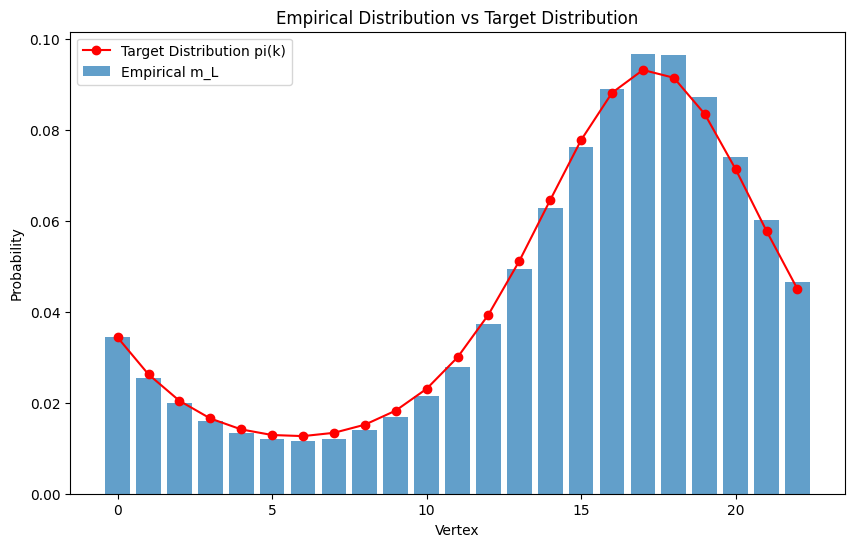

In [7]:
# Question 6:

# Print comparison
print("State\tEmpirical m_L\tTarget pi(k)")
for k in range(N):
    print(f"{k}\t{m_L[k]:.5f}\t\t{pi[k]:.5f}")

# Plot comparison
plt.figure(figsize=(10,6))
plt.bar(range(N), m_L, alpha=0.7, label='Empirical m_L')
plt.plot(range(N), pi, 'ro-', label='Target Distribution pi(k)')
plt.xlabel('Vertex')
plt.ylabel('Probability')
plt.title('Empirical Distribution vs Target Distribution')
plt.legend()
plt.show()

# it is evident that the emperical m_L is very close to the target distribution pi(k) as we can see from the plot and the comparison table below

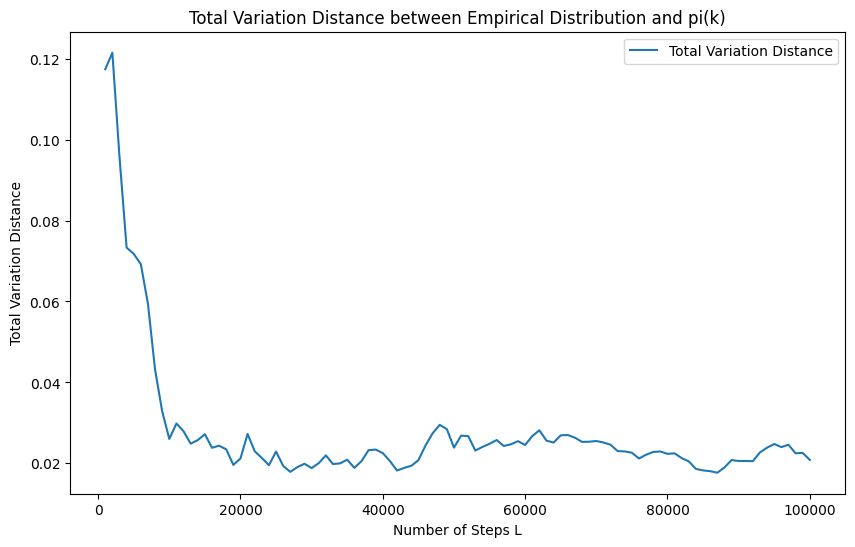

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Re intialize stuff
current_state = 0  # Starting at vertex 0
mh_walk = np.zeros(L, dtype=int)
counts = np.zeros(N, dtype=int)
tv_distances = []
Ls = []

# Simulate the MH walk and compute TV distance at intervals
for step in range(L):
    # Determine neighbors
    left = (current_state - 1) % N
    right = (current_state + 1) % N
    # Propose the next state uniformly
    proposed_state = np.random.choice([left, right])
    # Compute acceptance probability
    alpha = min(1, pi[proposed_state] / pi[current_state])
    # Decide whether to accept the move
    if np.random.rand() < alpha:
        current_state = proposed_state  # Accept the move
    # Else, stay at current_state
    mh_walk[step] = current_state
    # Update counts
    counts[current_state] += 1
    # Checkpoint to compute TV distance
    if (step + 1) % checkpoint == 0:
        m_L = counts / (step + 1)
        tv = 0.5 * np.sum(np.abs(m_L - pi))
        tv_distances.append(tv)
        Ls.append(step + 1)

# Plot TV distance vs L
plt.figure(figsize=(10,6))
plt.plot(Ls, tv_distances, label='Total Variation Distance')
plt.xlabel('Number of Steps L')
plt.ylabel('Total Variation Distance')
plt.title('Total Variation Distance between Empirical Distribution and pi(k)')
plt.legend()
# plt.grid(True)
plt.show()
